# Simulation experiments

In [1]:

import pandas as pd

from model.model_code import EnergyCommunity

model = EnergyCommunity()


In [87]:
model.all_agents

{model.agents.Coordinator: [<model.agents.Coordinator at 0x10c6eddb0>],
 model.agents.Residential: [<model.agents.Residential at 0x10c6eec50>,
 model.agents.NonResidential: [<model.agents.NonResidential at 0x10c6ef040>,
 model.agents.EVChargingStation: [<model.agents.EVChargingStation at 0x10c9bd600>]}

In [88]:
model.all_assets

{model.agents.Solar: [<model.agents.Solar at 0x10c9bccd0>,
  <model.agents.Solar at 0x10c9bd5d0>]}

In [3]:
from model.agents import *

In [19]:
agent = model.all_agents[NonResidential][0]

In [65]:
start_date = datetime.datetime(2021, 1, 1)

In [66]:
date = start_date.strftime('%Y-%m-%d')

In [67]:
date

'2021-01-01'

In [68]:
index = pd.date_range(start=date, periods=96, freq='15min')

In [69]:
df = pd.DataFrame(index=index)

In [70]:
generation_schedule = pd.Series(index=index, data=0)
for asset in agent.assets:
    generation_schedule += asset.generate_supply_schedule()

In [74]:
demand = agent.get_demand_schedule()

In [71]:
generation_schedule

2021-01-01 00:00:00    0.0
2021-01-01 00:15:00    0.0
2021-01-01 00:30:00    0.0
2021-01-01 00:45:00    0.0
2021-01-01 01:00:00    0.0
                      ... 
2021-01-01 22:45:00    0.0
2021-01-01 23:00:00    0.0
2021-01-01 23:15:00    0.0
2021-01-01 23:30:00    0.0
2021-01-01 23:45:00    0.0
Freq: 15T, Length: 96, dtype: float64

In [79]:
demand = (demand - generation_schedule).clip(lower=0)
demand

2021-01-01 00:00:00    18.5
2021-01-01 00:15:00    18.5
2021-01-01 00:30:00    18.5
2021-01-01 00:45:00    17.0
2021-01-01 01:00:00    21.0
                       ... 
2021-01-01 22:45:00    71.0
2021-01-01 23:00:00    18.5
2021-01-01 23:15:00    20.0
2021-01-01 23:30:00    18.5
2021-01-01 23:45:00    17.0
Freq: 15T, Length: 96, dtype: float64

<AxesSubplot:>

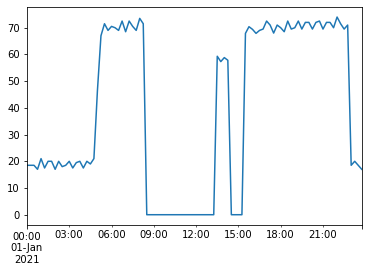

In [80]:
demand.plot()

<AxesSubplot:>

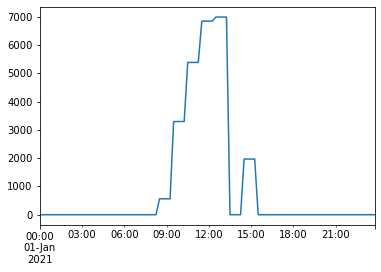

In [84]:
(generation_schedule-demand).clip(lower=0).plot()

In [9]:
all_agents = {}
if agent['agent_type'] in all_agents:
    all_agents[agent['agent_type']].append(agent)

In [13]:
agent = Coordinator(unique_id=0, model= pass)

SyntaxError: invalid syntax (2518225679.py, line 1)

In [86]:
EnergyCommunity.a

model.model_code.EnergyCommunity

In [13]:
all_agents[agent['agent_type']] = [agent]

In [8]:
agent_list.items()

AttributeError: 'list' object has no attribute 'items'

In [12]:
model.all_agents[NonResidential][0].member

'drink_packaging_sme'

In [5]:
from model.agents import *

In [10]:
agent_counts = {
    Coordinator: 1,
    Residential: 10,
    Commercial: 2,
    Curio: 1,
    Sligro: 1,
    KoningDrinks: 1,
    EVChargingStation: 1,
    Solar: 2,
    Wind: 0
}

In [11]:
for agent_type, agent_count in agent_counts.items():
    for i in range(agent_count):
        print(i, agent_type)

0 <class 'model.agents.Coordinator'>
0 <class 'model.agents.Residential'>
1 <class 'model.agents.Residential'>
2 <class 'model.agents.Residential'>
3 <class 'model.agents.Residential'>
4 <class 'model.agents.Residential'>
5 <class 'model.agents.Residential'>
6 <class 'model.agents.Residential'>
7 <class 'model.agents.Residential'>
8 <class 'model.agents.Residential'>
9 <class 'model.agents.Residential'>
0 <class 'model.agents.Commercial'>
1 <class 'model.agents.Commercial'>
0 <class 'model.agents.Curio'>
0 <class 'model.agents.Sligro'>
0 <class 'model.agents.KoningDrinks'>
0 <class 'model.agents.EVChargingStation'>
0 <class 'model.agents.Solar'>
1 <class 'model.agents.Solar'>


In [12]:

start_date = datetime.datetime(2021, 1, 1)
date = start_date.strftime('%Y-%m-%d')

In [13]:
date

'2021-01-01'

In [22]:
tomorrow = datetime.datetime.strptime(date, '%Y-%m-%d') + datetime.timedelta(days=1)

In [25]:
tomorrow.strftime('%Y-%m-%d')

'2021-01-02'

In [57]:
import numpy as np
import random

random.seed(0)
import matplotlib.pyplot as plt

In [18]:
supply = np.random.rand(10) * 5
demand = np.random.rand(10) * 10

In [41]:
mean = np.mean(supply)
mean_list = []
for i in range(len(supply)):
    mean_list.append(mean)

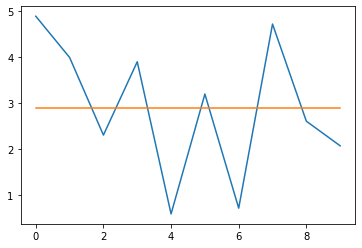

In [44]:
fig, ax = plt.subplots()
ax.plot(supply)
ax.plot(mean_list)

In [29]:
supply - demand

array([ 2.24753559, -3.74654407, -2.25410651, -1.78169361,  0.40347412,
       -2.97674986, -5.40419079, -1.44599538, -6.82823918, -4.74489329])

In [20]:
demand

array([2.64555612, 7.74233689, 4.56150332, 5.68433949, 0.187898  ,
       6.17635497, 6.12095723, 6.16933997, 9.43748079, 6.81820299])

In [26]:
supply

array([4.89309171, 3.99579282, 2.30739681, 3.90264588, 0.59137213,
       3.19960511, 0.71676644, 4.72334459, 2.60924161, 2.0733097 ])

In [59]:

from model.agents import *

In [60]:
# Household types is chosen randomly from the list of possible household types
number_of_households = 10
hh_type = ['hh1_consumption [kWh]', 'hh2_consumption [kWh]', 'hh3_consumption [kWh]']
residential_agents = []
for _ in range(number_of_households):
    residential_agents.append({'agent_type': Residential,
                               'member_name': random.choice(hh_type),
                               'member_type': MemberType.CONSUMER,
                               'asset_list': None})

In [68]:
non_residential_agents = [{'agent_type': NonResidential,
                           'member_name': 'drink_packaging_sme',
                           'member_type': MemberType.PROSUMER,
                           'asset_list': [
                               {'asset_type': AssetType.SOLAR,
                                'capacity': 1285,
                                'efficiency': 0.20,
                                'price': 0.15}]},
                          {'agent_type': NonResidential,
                           'member_name': 'food_packaging_sme',
                           'member_type': MemberType.PROSUMER,
                           'asset_list': [
                               {'asset_type': AssetType.SOLAR,
                                'capacity': 2000,
                                'efficiency': 0.20,
                                'price': 0.15}]},
                          {'agent_type': NonResidential,
                           'member_name': 'school_mbo',
                           'member_type': MemberType.CONSUMER,
                           'asset_list': None},
                          {'agent_type': NonResidential,
                           'member_name': 'EV_bus_charging_station',
                           'member_type': MemberType.CONSUMER,
                           'asset_list': None}]


In [56]:
residential_agents + non_residential_agents

[{'member_name': 'hh3_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh3_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh3_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh2_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh2_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh1_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh1_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh2_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh1_consumption [kWh]',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None},
 {'member_name': 'hh3_consum

In [69]:
a = [{'agent_type': Coordinator}] + non_residential_agents

In [70]:
for agent in a:
    print(agent['agent_type'])

<class 'model.agents.Coordinator'>
<class 'model.agents.NonResidential'>
<class 'model.agents.NonResidential'>
<class 'model.agents.NonResidential'>
<class 'model.agents.NonResidential'>


In [67]:
a

[{'agent_type': model.agents.Coordinator},
 {'member_name': 'drink_packaging_sme',
  'member_type': <MemberType.PROSUMER: 2>,
  'asset_list': [{'asset_type': <AssetType.SOLAR: 1>,
    'capacity': 1285,
    'efficiency': 0.2,
    'price': 0.15}]},
 {'member_name': 'food_packaging_sme',
  'member_type': <MemberType.PROSUMER: 2>,
  'asset_list': [{'asset_type': <AssetType.SOLAR: 1>,
    'capacity': 2000,
    'efficiency': 0.2,
    'price': 0.15}]},
 {'member_name': 'school_mbo',
  'member_type': <MemberType.CONSUMER: 1>,
  'asset_list': None}]